In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [0]:
d=pd.read_csv("/content/Dataset_KPCA.csv")
dataset=d.to_numpy()

In [0]:
# split into input (X) and output (Y) variables
X = dataset[:,0:5]
Y = dataset[:,5]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, shuffle=True)

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [6]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:' ,accuracy*100)
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_pred)
print('Precision: %f', precision*100)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_pred)
print('Recall: %f', recall*100)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_pred)
print('F1 score: %f',f1)
 # kappa
kappa = cohen_kappa_score(Y_test, Y_pred)
print('Cohens kappa: %f', kappa)
# ROC AUC
auc_1 = roc_auc_score(Y_test, Y_pred)
print('ROC AUC: %f', auc_1)
# confusion matrix
matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix' , matrix)
# MAE
mae = mean_absolute_error(Y_test, Y_pred)
print('Mean Absolute Error', mae)
#RMSE
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error', rmse)

Accuracy: 85.09234828496042
Precision: %f 82.36336779911375
Recall: %f 64.26924850161365
F1 score: %f 0.7219992230998318
Cohens kappa: %f 0.6222611327811911
ROC AUC: %f 0.7916860676273051
Confusion Matrix [[9467  597]
 [1550 2788]]
Mean Absolute Error 0.14907651715039577
Root Mean Squared Error 0.38610428274029257


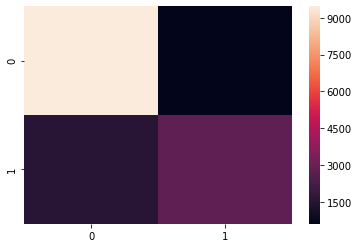

In [7]:
#Plot of the Confusion Matrix
ax = sns.heatmap(matrix)

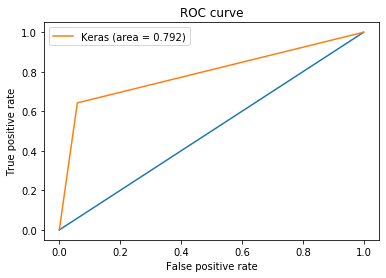

In [8]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()